# Churn Prediction

#### Customer churn, also known as customer attrition, occurs when customers stop doing business with a company. The companies are interested in identifying segments of these customers because the price for acquiring a new customer is usually higher than retaining the old one. In this project we shall create a simple churn prediction model using dataset of a Telecom-Sector.

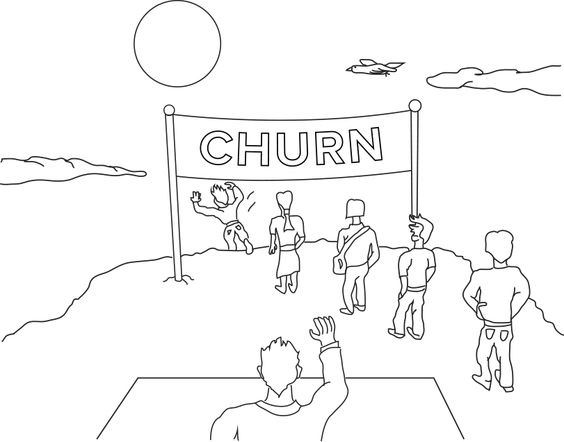

In [162]:
from IPython.display import Image
Image(filename='Churn.jpg')

In [163]:
# Importing the essential modules

import graphviz
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [164]:
# Reading the dataset

df = pd.read_csv('Telco-Customer-Churn.csv')

In [165]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1            No             DSL            Yes  ...              Yes   
2            No             DSL            Yes  ...               No   
3            No             DSL            Yes  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [166]:
df.shape

(7043, 21)

In [167]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [168]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [169]:
total_charges_filter = df.TotalCharges == " "
df = df[~total_charges_filter]
df.shape

(7032, 21)

In [170]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [171]:
# Checking if there are null values or not

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [172]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [173]:
df.describe(include='all')

customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7032   7032    7032.000000    7032       7032  7032.000000   
unique        7032      2            NaN       2          2          NaN   
top     5825-XJOCM   Male            NaN      No         No          NaN   
freq             1   3549            NaN    3639       4933          NaN   
mean           NaN    NaN       0.162400     NaN        NaN    32.421786   
std            NaN    NaN       0.368844     NaN        NaN    24.545260   
min            NaN    NaN       0.000000     NaN        NaN     1.000000   
25%            NaN    NaN       0.000000     NaN        NaN     9.000000   
50%            NaN    NaN       0.000000     NaN        NaN    29.000000   
75%            NaN    NaN       0.000000     NaN        NaN    55.000000   
max            NaN    NaN       1.000000     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count          7032          7032            7032           7032  ...   
unique            2             2               3              2  ...   
top             Yes            No     Fiber optic             No  ...   
freq           6352          4065            3096           5017  ...   
mean            NaN           NaN             NaN            NaN  ...   
std             NaN           NaN             NaN            NaN  ...   
min             NaN           NaN             NaN            NaN  ...   
25%             NaN           NaN             NaN            NaN  ...   
50%             NaN           NaN             NaN            NaN  ...   
75%             NaN           NaN             NaN            NaN  ...   
max             NaN           NaN             NaN            NaN  ...   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7032        7032        7032            7032   
unique                2           2           2               2   
top                  No          No          No              No   
freq               4614        4992        4329            4301   
mean                NaN         NaN         NaN             NaN   
std                 NaN         NaN         NaN             NaN   
min                 NaN         NaN         NaN             NaN   
25%                 NaN         NaN         NaN             NaN   
50%                 NaN         NaN         NaN             NaN   
75%                 NaN         NaN         NaN             NaN   
max                 NaN         NaN         NaN             NaN   

              Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
count             7032             7032              7032    7032.000000   
unique               3                2                 4            NaN   
top     Month-to-month              Yes  Electronic check            NaN   
freq              3875             4168              2365            NaN   
mean               NaN              NaN               NaN      64.798208   
std                NaN              NaN               NaN      30.085974   
min                NaN              NaN               NaN      18.250000   
25%                NaN              NaN               NaN      35.587500   
50%                NaN              NaN               NaN      70.350000   
75%                NaN              NaN               NaN      89.862500   
max                NaN              NaN               NaN     118.750000   

        TotalCharges  Churn  
count    7032.000000   7032  
unique           NaN      2  
top              NaN     No  
freq             NaN   5163  
mean     2283.300441    NaN  
std      2266.771362    NaN  
min        18.800000    NaN  
25%       401.450000    NaN  
50%      1397.475000    NaN  
75%      3794.737500    NaN  
max      8684.800000    NaN  

[11 rows x 21 columns]

#### Most of the feature names are self-explanatory, except for:

- Partner: whether the customer has a partner or not (Yes, No),
- Dependents: whether the customer has dependents or not (Yes, No),
- OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),
- tenure: number of months the customer has stayed with the company,
- MonthlyCharges: the amount charged to the customer monthly,
- TotalCharges: the total amount charged to the customer.

In [174]:
# Combining two features into two lists to analyze them jointly

categorical_features = [
                        "gender",
                        "SeniorCitizen",
                        "Partner",
                        "Dependents",
                        "PhoneService",
                        "MultipleLines",
                        "InternetService",
                        "OnlineSecurity",
                        "OnlineBackup",
                        "DeviceProtection",
                        "TechSupport",
                        "StreamingTV",
                        "StreamingMovies",
                        "Contract",
                        "PaperlessBilling",
                        "PaymentMethod",
                        ]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [175]:
df[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

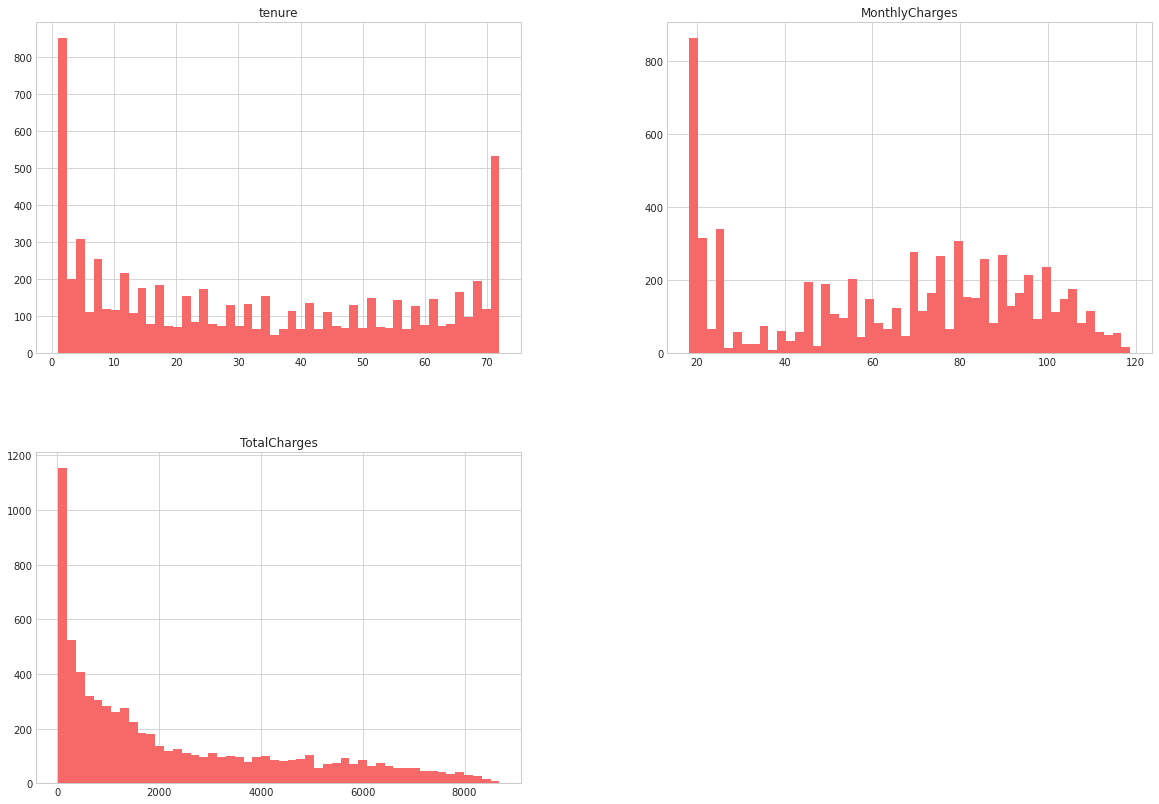

In [176]:
with plt.style.context('seaborn-whitegrid'):
    df[numerical_features].hist(bins=50,figsize=(20,14),color='#f76868')

#### More detailed graphs are plotted below

array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'MonthlyCharges'}>,
       <AxesSubplot:title={'center':'TotalCharges'}>], dtype=object)

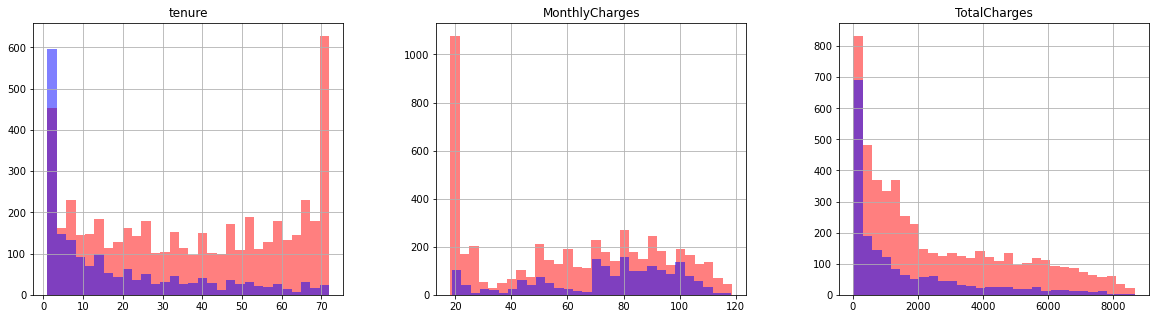

In [177]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
df[df.Churn == "No"][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)
df[df.Churn == "Yes"][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)

#### We look at distributions of numerical features in relation to the target variable(Churn). We can observe that greater the TotalCharges and tenure are less is the probability of churning.

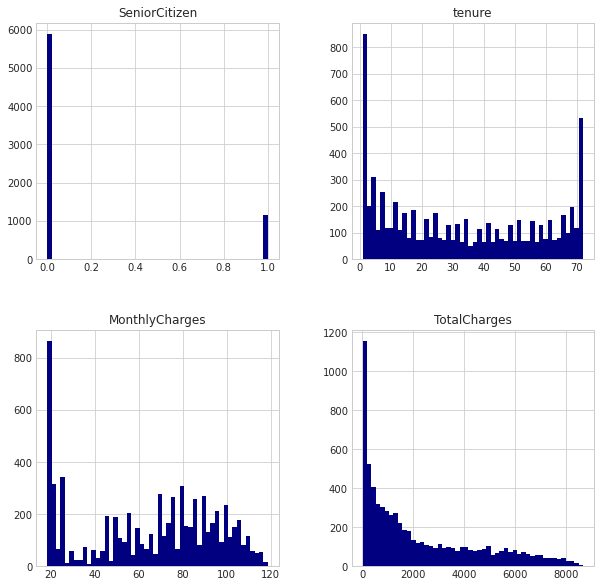

In [178]:
with plt.style.context('seaborn-whitegrid'):
    df.hist(bins=50,figsize=(10,10),color='navy')

#### a. Senior Citizens are churning the least
#### b. People having the highest tenure are senior citizens and there is a trend in rise and fall of churning
#### c. With rise in total charges we can see fall in churning

In [179]:
churn_count=df['SeniorCitizen'].value_counts()
print("Senior Citizen count:-")
churn_count

Senior Citizen count:-


0    5890
1    1142
Name: SeniorCitizen, dtype: int64

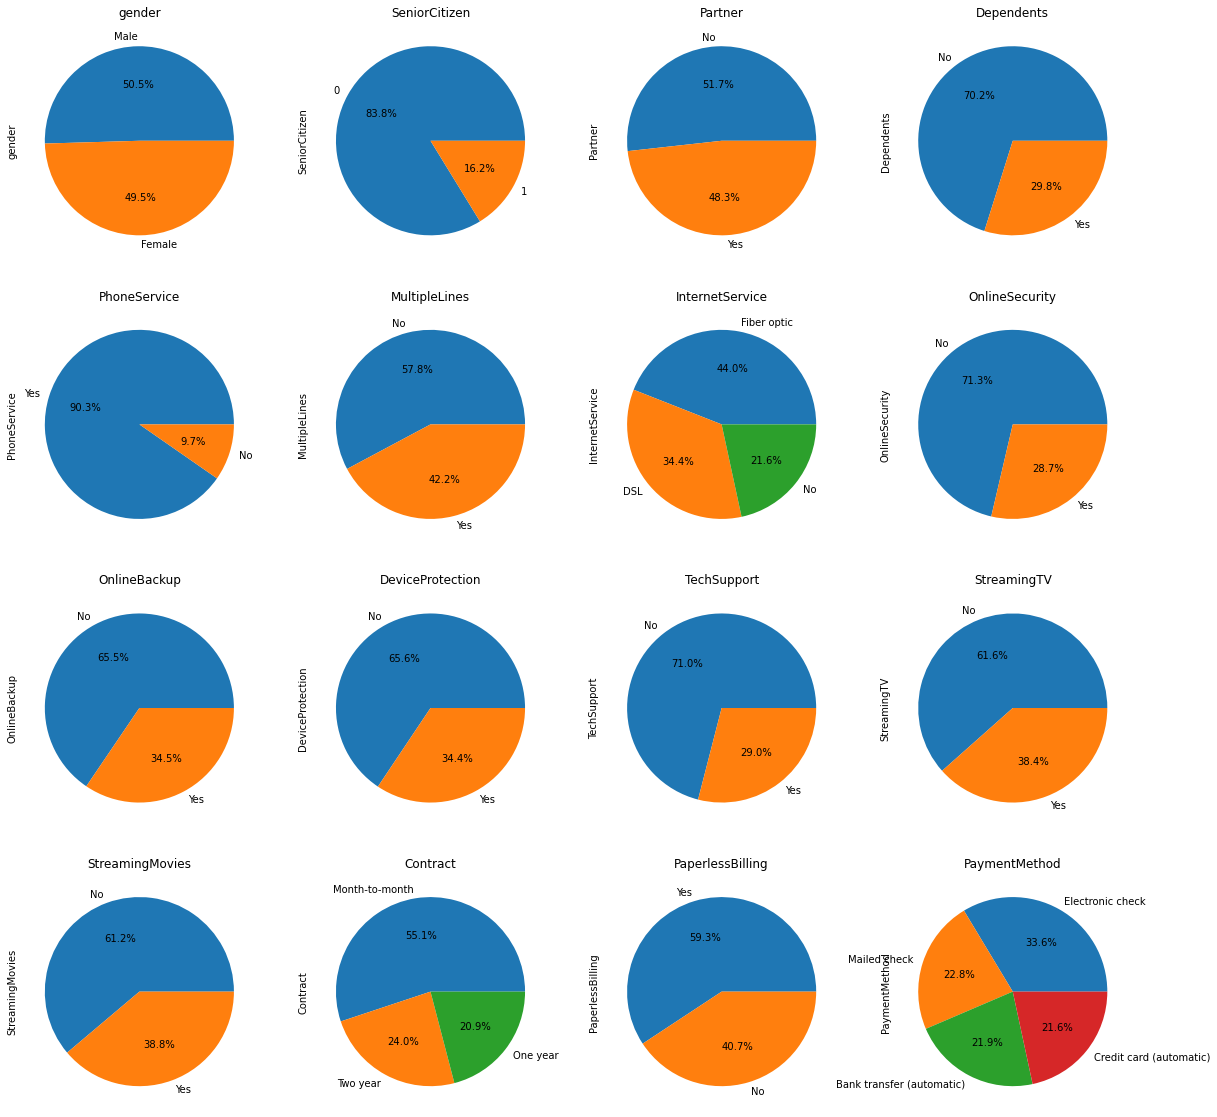

In [180]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(20, 20))
row, col = 0, 0
for i, j in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[j].value_counts().plot(kind='pie', ax=ax[row, col],autopct='%1.1f%%').set_title(j)

#### We observe that Senior citizens and customers without phone service are less represented in the data.

In [181]:
churn_count=df['PhoneService'].value_counts()
print("Phone Service:-")
churn_count

Phone Service:-


Yes    6352
No      680
Name: PhoneService, dtype: int64

Text(0.5, 1.0, 'churned')

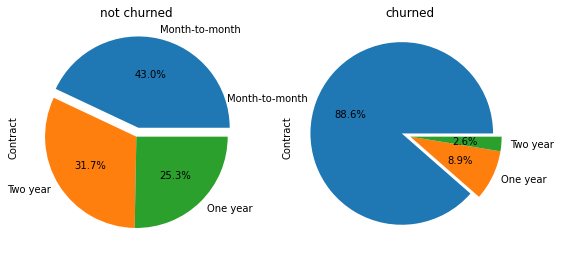

In [182]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(9, 9))

df[df.Churn == "No"][feature].value_counts().plot(kind='pie', ax=ax[0],autopct='%1.1f%%',explode = [0.1, 0, 0.]).set_title('not churned')
df[df.Churn == "Yes"][feature].value_counts().plot(kind='pie', ax=ax[1],autopct='%1.1f%%',explode = [0.1, 0, 0.]).set_title('churned')

#### Users who have a month-to-month contract are more likely to churn than users with long term contracts.

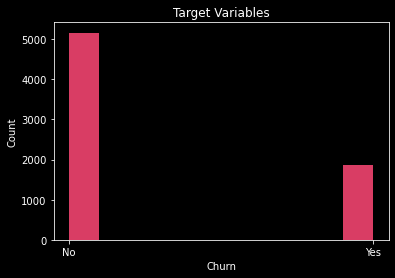

In [183]:
with plt.style.context('dark_background'):
    plt.hist(df['Churn'] , color ='#d93d64')
    plt.title('Target Variables')
    plt.xlabel('Churn')
    plt.ylabel('Count')

No     5163
Yes    1869
Name: Churn, dtype: int64


<AxesSubplot:ylabel='Churn'>

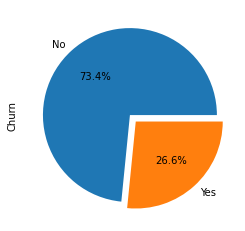

In [184]:
# Churn Pie-Chart
churn_count=df['Churn'].value_counts()
print(churn_count)
churn_count.plot.pie(explode=[0,0.1],autopct='%1.1f%%')

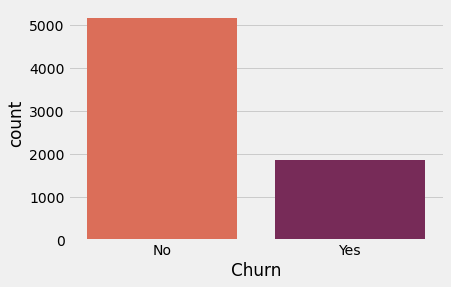

In [185]:
with plt.style.context('fivethirtyeight'):
    sns.countplot(x='Churn',data=df,palette='rocket_r')

In [186]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [187]:
df.shape

(7032, 21)

In [188]:
# Histograms
def histplot(columns,data):
    fig = px.histogram(df,x=df[column],color='Churn')
    fig.show()

In [189]:
col = [ 'customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
for column in col:
    histplot(column,df)

#### Histograms with hover effect showing real time data 

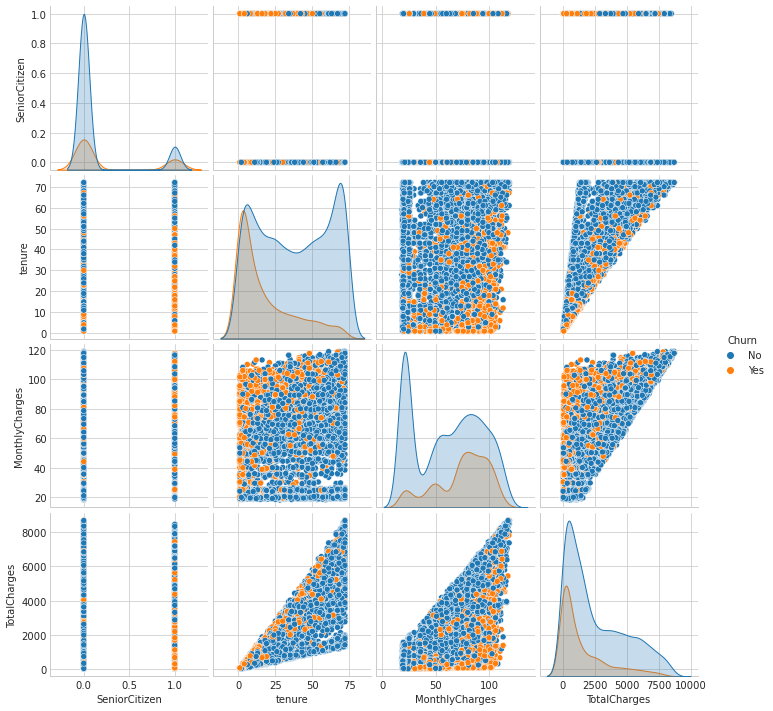

In [190]:
with plt.style.context('seaborn-whitegrid'):
    sns.pairplot(df,hue='Churn')

In [191]:
final_dataset = df[['gender','tenure', 'PhoneService', 'MultipleLines', 'DeviceProtection', 'TechSupport',
                    'Contract','PaymentMethod','MonthlyCharges', 'Churn']]

In [192]:
final_dataset.head()

gender  tenure PhoneService MultipleLines DeviceProtection TechSupport  \
0  Female       1           No            No               No          No   
1    Male      34          Yes            No              Yes          No   
2    Male       2          Yes            No               No          No   
3    Male      45           No            No              Yes         Yes   
4  Female       2          Yes            No               No          No   

         Contract              PaymentMethod  MonthlyCharges Churn  
0  Month-to-month           Electronic check           29.85    No  
1        One year               Mailed check           56.95    No  
2  Month-to-month               Mailed check           53.85   Yes  
3        One year  Bank transfer (automatic)           42.30    No  
4  Month-to-month           Electronic check           70.70   Yes

In [193]:
# Converting the categorical variables into numerical and avoiding Dummy Variable Trap

final_dataset = pd.get_dummies(final_dataset , drop_first=True)

In [194]:
final_dataset.head()

tenure  MonthlyCharges  gender_Male  PhoneService_Yes  MultipleLines_Yes  \
0       1           29.85            0                 0                  0   
1      34           56.95            1                 1                  0   
2       2           53.85            1                 1                  0   
3      45           42.30            1                 0                  0   
4       2           70.70            0                 1                  0   

   DeviceProtection_Yes  TechSupport_Yes  Contract_One year  \
0                     0                0                  0   
1                     1                0                  1   
2                     0                0                  0   
3                     1                1                  1   
4                     0                0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  Churn_Yes  
0                               1                           0          0  
1                               0                           1          0  
2                               0                           1          1  
3                               0                           0          0  
4                               1                           0          1

## Correlation Matrix

In [195]:
corrmat = final_dataset.corr()
corrmat

tenure  MonthlyCharges  gender_Male  \
tenure                                 1.000000        0.246862     0.005285   
MonthlyCharges                         0.246862        1.000000    -0.013779   
gender_Male                            0.005285       -0.013779     1.000000   
PhoneService_Yes                       0.007877        0.248033    -0.007515   
MultipleLines_Yes                      0.332399        0.490912    -0.008883   
DeviceProtection_Yes                   0.361520        0.482607    -0.000807   
TechSupport_Yes                        0.325288        0.338301    -0.008507   
Contract_One year                      0.202338        0.004810     0.007755   
Contract_Two year                      0.563801       -0.073256    -0.003603   
PaymentMethod_Credit card (automatic)  0.232800        0.030055     0.001632   
PaymentMethod_Electronic check        -0.210197        0.271117     0.000844   
PaymentMethod_Mailed check            -0.232181       -0.376568     0.013199   
Churn_Yes                             -0.354049        0.192858    -0.008545   

                                       PhoneService_Yes  MultipleLines_Yes  \
tenure                                         0.007877           0.332399   
MonthlyCharges                                 0.248033           0.490912   
gender_Male                                   -0.007515          -0.008883   
PhoneService_Yes                               1.000000           0.279530   
MultipleLines_Yes                              0.279530           1.000000   
DeviceProtection_Yes                          -0.070076           0.201733   
TechSupport_Yes                               -0.095138           0.100421   
Contract_One year                             -0.003142          -0.003594   
Contract_Two year                              0.004442           0.106618   
PaymentMethod_Credit card (automatic)         -0.006916           0.060319   
PaymentMethod_Electronic check                 0.002747           0.083583   
PaymentMethod_Mailed check                    -0.004463          -0.227672   
Churn_Yes                                      0.011691           0.040033   

                                       DeviceProtection_Yes  TechSupport_Yes  \
tenure                                             0.361520         0.325288   
MonthlyCharges                                     0.482607         0.338301   
gender_Male                                       -0.000807        -0.008507   
PhoneService_Yes                                  -0.070076        -0.095138   
MultipleLines_Yes                                  0.201733         0.100421   
DeviceProtection_Yes                               1.000000         0.332850   
TechSupport_Yes                                    0.332850         1.000000   
Contract_One year                                  0.102911         0.096258   
Contract_Two year                                  0.165248         0.240924   
PaymentMethod_Credit card (automatic)              0.111252         0.117024   
PaymentMethod_Electronic check                    -0.003308        -0.114807   
PaymentMethod_Mailed check                        -0.187325        -0.084631   
Churn_Yes                                         -0.066193        -0.164716   

                                       Contract_One year  Contract_Two year  \
tenure                                          0.202338           0.563801   
MonthlyCharges                                  0.004810          -0.073256   
gender_Male                                     0.007755          -0.003603   
PhoneService_Yes                               -0.003142           0.004442   
MultipleLines_Yes                              -0.003594           0.106618   
DeviceProtection_Yes                            0.102911           0.165248   
TechSupport_Yes                                 0.096258           0.240924   
Contract_One year                               1.000000          -0.28884

#### Shows correlation between datas

<AxesSubplot:>

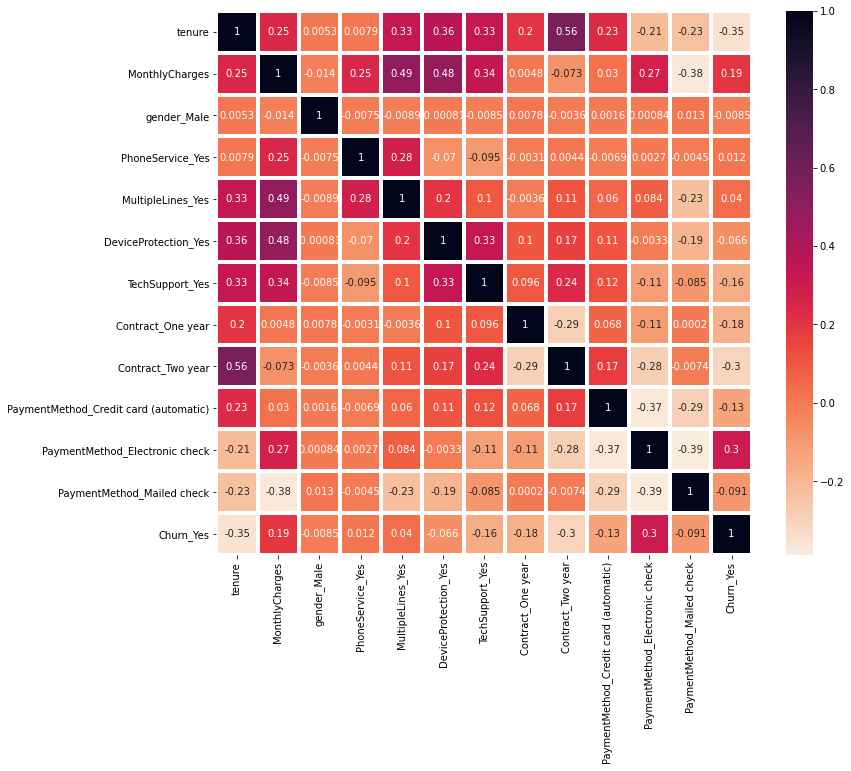

In [196]:
top_corr_features = corrmat.index
plt.figure(figsize=(12,10))
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='rocket_r',linecolor='white',linewidth=3)

#### Heat Map of our final dataset 

In [197]:
final_dataset.head()

tenure  MonthlyCharges  gender_Male  PhoneService_Yes  MultipleLines_Yes  \
0       1           29.85            0                 0                  0   
1      34           56.95            1                 1                  0   
2       2           53.85            1                 1                  0   
3      45           42.30            1                 0                  0   
4       2           70.70            0                 1                  0   

   DeviceProtection_Yes  TechSupport_Yes  Contract_One year  \
0                     0                0                  0   
1                     1                0                  1   
2                     0                0                  0   
3                     1                1                  1   
4                     0                0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  Churn_Yes  
0                               1                           0          0  
1                               0                           1          0  
2                               0                           1          1  
3                               0                           0          0  
4                               1                           0          1

In [198]:
# Splitting the Dataset into Dependent and Independent Variables

X = final_dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y = final_dataset.iloc[:,12].values

In [199]:
X.head()

tenure  MonthlyCharges  gender_Male  PhoneService_Yes  MultipleLines_Yes  \
0       1           29.85            0                 0                  0   
1      34           56.95            1                 1                  0   
2       2           53.85            1                 1                  0   
3      45           42.30            1                 0                  0   
4       2           70.70            0                 1                  0   

   DeviceProtection_Yes  TechSupport_Yes  Contract_One year  \
0                     0                0                  0   
1                     1                0                  1   
2                     0                0                  0   
3                     1                1                  1   
4                     0                0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0

In [200]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

## Splitting the dataset into Training and Testing data


In [201]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (4922, 12)
Shape of X_test: (2110, 12)
Shape of y_train: (4922,)
Shape of y_test: (2110,)


In [202]:
# Standardizing the dataset

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [203]:
print(X_train)

[[-1.29246834 -0.67480309 -1.00447976 ... -0.5248428  -0.7059219
  -0.54494926]
 [-0.59814323  1.16816114 -1.00447976 ... -0.5248428  -0.7059219
  -0.54494926]
 [-1.29246834 -1.51145563  0.99554022 ... -0.5248428  -0.7059219
   1.83503323]
 ...
 [ 0.62713637 -0.63488329 -1.00447976 ...  1.90533242 -0.7059219
  -0.54494926]
 [ 0.30039514  0.83050614  0.99554022 ...  1.90533242 -0.7059219
  -0.54494926]
 [-1.16994038 -0.65983317  0.99554022 ...  1.90533242 -0.7059219
  -0.54494926]]


In [204]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [205]:
print(model.feature_importances_)

[0.26997568 0.3816875  0.03923107 0.01062853 0.02484157 0.03320321
 0.02527188 0.06584468 0.07665826 0.01970649 0.03833906 0.01461208]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

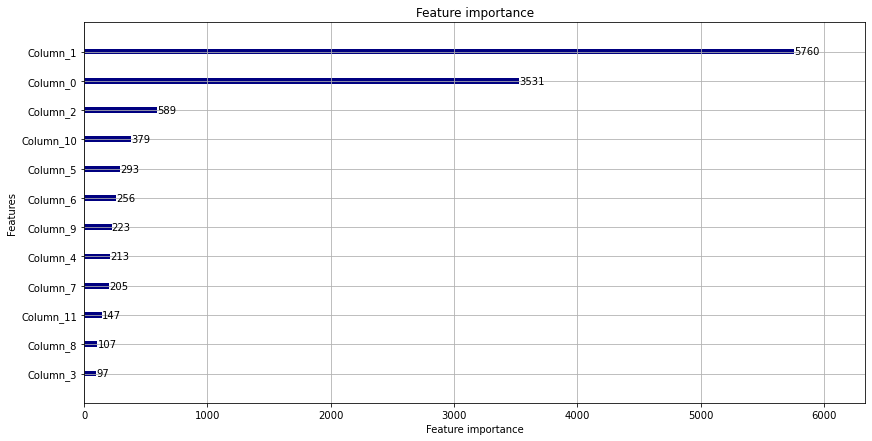

In [206]:
!pip install lightgbm
from lightgbm import LGBMClassifier,plot_importance
light = LGBMClassifier(n_estimators=200,learning_rate=0.11,
                      min_child_samples=30,num_leaves=60)


light.fit(X_train,y_train)
plt.rcParams["figure.figsize"] = (14, 7)
plot_importance(light,color='navy',)

#### Shows how important are features in meeting target value
#### Monthly charges has the highest importance and people with phone service have the least importance

## Random Forest Classifier

In [207]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 50, criterion="entropy")
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [208]:
y_pred = rfc.predict(X_test)

In [209]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc_accuracy = accuracy_score(y_test,y_pred)* 100
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n",rfc_accuracy,'%')

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1527
           1       0.63      0.48      0.54       583

    accuracy                           0.78      2110
   macro avg       0.72      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110


Confusion Matrix:
 [[1363  164]
 [ 305  278]]

Accuracy:
 77.77251184834122 %


## K-Nearest Neighbours (KNN algorithm)

In [210]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)

In [211]:
final_dataset.head()

tenure  MonthlyCharges  gender_Male  PhoneService_Yes  MultipleLines_Yes  \
0       1           29.85            0                 0                  0   
1      34           56.95            1                 1                  0   
2       2           53.85            1                 1                  0   
3      45           42.30            1                 0                  0   
4       2           70.70            0                 1                  0   

   DeviceProtection_Yes  TechSupport_Yes  Contract_One year  \
0                     0                0                  0   
1                     1                0                  1   
2                     0                0                  0   
3                     1                1                  1   
4                     0                0                  0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                  0                                      0   
1                  0                                      0   
2                  0                                      0   
3                  0                                      0   
4                  0                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  Churn_Yes  
0                               1                           0          0  
1                               0                           1          0  
2                               0                           1          1  
3                               0                           0          0  
4                               1                           0          1

In [212]:
# Splitting the Dataset into Dependent and Independent Variables

X = final_dataset.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
y = final_dataset.iloc[:,12].values

In [213]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=100)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [214]:
y_pred = classifier.predict(X_test)

In [215]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn_accuracy = accuracy_score(y_test,y_pred)* 100
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n",knn_accuracy ,'%')

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86      1527
           1       0.68      0.47      0.55       583

    accuracy                           0.79      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110


Confusion Matrix:
 [[1398  129]
 [ 311  272]]

Accuracy:
 79.14691943127961 %


## Support Vector Machine (SVM)

In [216]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)

In [217]:
# Importing svm model
from sklearn import svm

# Create svm classifier
clf = svm.SVC(kernel = 'linear')

# Training model using training sets
clf.fit(X_train,y_train)

# Predict response of the dataset
y_pred = clf.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
svm_accuracy = accuracy_score(y_test,y_pred) * 100
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n",svm_accuracy,'%')

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1527
           1       0.67      0.57      0.61       583

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.80      0.80      2110


Confusion Matrix:
 [[1361  166]
 [ 253  330]]

Accuracy:
 80.14218009478672 %


## Logistic Regression

In [219]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)

In [220]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [221]:
log_accuracy = accuracy_score(y_test,y_pred)*100
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n", log_accuracy,'%')

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1527
           1       0.68      0.54      0.60       583

    accuracy                           0.80      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.79      0.80      0.80      2110


Confusion Matrix:
 [[1381  146]
 [ 268  315]]

Accuracy:
 80.37914691943128 %


## Decision Tree

In [222]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=58)

In [223]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)
tree_accuracy = accuracy_score(y_test,y_pred)*100
print("Classification Report:\n",classification_report(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nAccuracy:\n",tree_accuracy,'%')

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1527
           1       0.68      0.54      0.60       583

    accuracy                           0.80      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.79      0.80      0.80      2110


Confusion Matrix:
 [[1381  146]
 [ 268  315]]

Accuracy:
 80.37914691943128 %


## Accuracy Table

In [224]:
model_comparision = pd.DataFrame({ 
    'Accuracy(%)':[tree_accuracy,log_accuracy,svm_accuracy,knn_accuracy,rfc_accuracy],      
    'Model':['Decision Tree','Logistic Regression','Support Vector Machine','K-Nearest Neighbours','Random Forest Classifier']
                                    })
model_comparision_df = model_comparision.sort_values(by='Accuracy(%)',ascending=False)
model_comparision_df = model_comparision_df.set_index('Model')
model_comparision_df.reset_index().style.set_properties(subset=["Model", "Accuracy(%)"])